# Проект "Исследование рынка заведений общественного питания Москвы"

1. [Описание проекта](#start)
2. [Изучение общей информации](#info)
3. [Предобработка данных](#preprocessing)
4. [Анализ данных](#analize)
5. [Общий вывод](#conclusion)    

<a id="start"></a>
## Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов? У вас есть открытые данные о заведениях общественного питания в Москве.\
**Цель проекта**: провести исследование рынка заведений общественного питания в Москве.

Для достижения цели нужно решить следующие **задачи**:
- изучить общую информацию и подготовить их к анализу;
- проанализировать данные, построить необходимые таблицы и графики;
- сделать на основе данных общий вывод и дать рекомендации;
- подготовить презентацию исследования для инвесторов.

<a id="info"></a>
## Изучение общей информации

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import math
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Посмотрим на данные.

In [2]:
data = pd.read_csv('/datasets/rest_data.csv')
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


**Вывод**

Итак, у нас есть таблица **rest_data** с данными по заведениям общественного питания в городе Москве. В таблице 6 столбцов и 15366 строк.Пропусков нет.\
Ее колонки:
- `id` — идентификатор объекта (тип **int64**)
- `object_name` — название объекта общественного питания (тип **object**)
- `chain` — сетевой ресторан (тип **object**)
- `object_type` — тип объекта общественного питания (тип **object**)
- `address` — адрес (тип **object**) 
- `number` — количество посадочных мест (тип **int64**).


<a id="preprocessing"></a>
## Предобработка данных

Проверим на явные дубликаты.

In [4]:
data.duplicated().sum()

0

Явных дубликатов нет. Посмотрим еще на значения в столбцах **chain** и **object_type**.

In [5]:
data['chain'].unique()

array(['нет', 'да'], dtype=object)

In [6]:
data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [7]:
data_ch = data.query('chain == "да"')
data_ch['object_name'].unique()

array(['ПИЦЦЕТОРИЯ', 'Брусника', 'Алло Пицца', 'Суши Wok', 'Тануки',
       "Домино'с Пицца", 'Готика', 'Му-Му', 'Хлеб насущный', 'TAJJ MAHAL',
       'ДАНКИН ДОНАТС', 'Вареничная №1', 'ШОКОЛАДНИЦА', 'Теремок',
       'Хинкальная', 'Шантимель', 'ТАНУКИ', 'Шоколадница', 'МУ-МУ',
       'Хинкальная City', 'КРУЖКА', 'СУШИ ВОК', 'ПРИМАВЕРА', 'Виктория',
       'Пиццерия «АКАДЕМИЯ»', 'Чебуречная СССР', 'МАКДОНАЛДС',
       'Grand Cru', 'Чайхона №1', 'Панчо Пицца', 'KFC', 'Сабвей',
       'ресторан «Якитория»', 'Советские времена', 'Кафе «Андерсон»',
       'Кафе «Subway»', 'Ресторан «Макдоналдс»', 'Суши Сет', 'Суши WoK',
       'Шоколад', 'Тирольские пироги', 'Гамбринус', 'Пицца Фабрика',
       'Subway', 'Кафе «Якитория»', 'Кафе «Тануки»', 'Сити Пицца',
       'Кружка', 'Кофе Хаус',
       'Кулинарная Лавка Братьев Караваевых Братья Караваевы', 'Суши Вок',
       'Прайм', 'Пицца Экспресс', 'Шоколадница Кофе Хаус', 'Николай',
       'Якитория', 'МАГНОЛИЯ', 'КОФЕ С СОБОЙ', 'Джаганнат', 'Волк

**Вывод**

Явных дубликатов нет. Названия колонок в таблице и типы данных указаны корректно. Единственное, я обратила внимание, что в колонке **object_name** для сетевых объектов много неявных дублей. Пока непонятно, помешает ли это дальнейшему анализу. Вопрос к тем, кто предоставил нам эту выгрузку. Но делать с этими данными ничего не будем, будем считать, что все хорошо. Двигаемся дальше.

<a id="analize"></a>
## Анализ данных

<a id="analize1"></a>
### Исследуем соотношение видов объектов общественного питания по количеству и построим график.

In [8]:
# Создадим сводную таблицу, где для каждого типа объекта общ. питания будет указано общее количество.
object_type_rate = (
    data.pivot_table(index='object_type', values='id', aggfunc='count')
        .sort_values(by='id', ascending=False)
        .reset_index()
)
object_type_rate.columns = ['object_type', 'amount']
object_type_rate['rate,%'] = round(((object_type_rate['amount'] / object_type_rate['amount'].sum()) * 100))
object_type_rate['rate,%'].astype('str')
object_type_rate    

,object_type,amount,"rate,%"
0,кафе,6099,40.0
1,столовая,2587,17.0
2,ресторан,2285,15.0
3,предприятие быстрого обслуживания,1923,13.0
4,бар,856,6.0
5,буфет,585,4.0
6,кафетерий,398,3.0
7,закусочная,360,2.0
8,магазин (отдел кулинарии),273,2.0


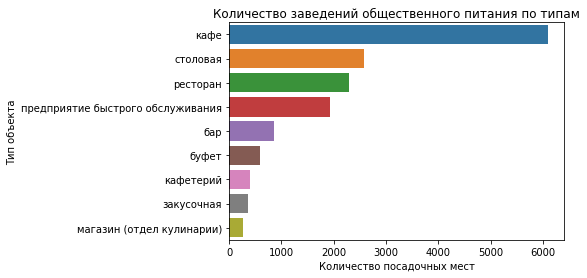

In [9]:
# Построим график
ax = sns.barplot(x='amount', y='object_type', data=object_type_rate)
ax.set_title('Количество заведений общественного питания по типам')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Тип объекта');

**Вывод**\
Итак, в Москве больше всего заведений: **кафе** (40%), **столовых** (17%) и **ресторанов** (15%). Меньше всего по количеству **магазинов(отдел кулинарии), закусочных и кафетериев (всего 2-3%)**.

<a id="analize2"></a>
###  Исследуем соотношение сетевых и несетевых заведений по количеству. Построим график.

In [10]:
# Построим сводную таблицу, где для сетевых и несетевых объектов будет указано их общее количество
chain_amount = (
    data.pivot_table(index='chain', values='id', aggfunc='count')
        .sort_values(by='id', ascending=False)
        .reset_index()
)
chain_amount.columns = ['chain', 'amount']
chain_amount 

,chain,amount
0,нет,12398
1,да,2968


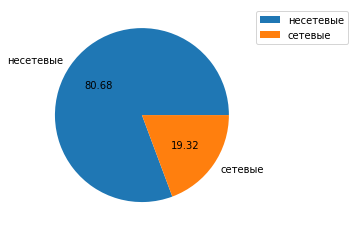

In [11]:
# так как групп всего 2, можно построить круговую диаграмму
labels=['несетевые', 'сетевые']
plt.pie(chain_amount['amount'], labels=labels, autopct='%.2f')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0));

**Вывод**\
Несетевых заведений в Москве существенно больше, чем сетевых (примерно, в 4 раза).

<a id="analize3"></a>
### Посмотрим, для какого вида объекта общественного питания характерно сетевое распространение.

In [12]:
# Создадим срез таблицы только с сетевыми объектами и по ней построим сводную таблицу
chain_est = (
    data.query('chain == "да"')
        .pivot_table(index='object_type', values='id', aggfunc='count')
        .sort_values(by='id', ascending=False)
        .reset_index()
)
chain_est.columns = ['object_type','amount']
chain_est['rate,%'] = round(((chain_est['amount'] / chain_est['amount'].sum()) * 100))
chain_est

,object_type,amount,"rate,%"
0,кафе,1396,47.0
1,предприятие быстрого обслуживания,791,27.0
2,ресторан,544,18.0
3,магазин (отдел кулинарии),78,3.0
4,закусочная,56,2.0
5,кафетерий,52,2.0
6,бар,37,1.0
7,буфет,11,0.0
8,столовая,3,0.0


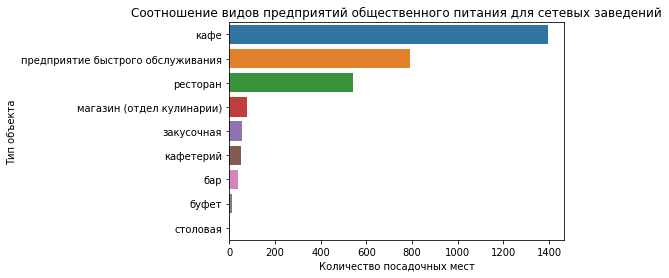

In [13]:
# построим график
ax = sns.barplot(x='amount', y='object_type', data=chain_est)
ax.set_title('Соотношение видов предприятий общественного питания для сетевых заведений')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Тип объекта');

**Вывод**\
Итак, среди сетевых предприятий общественного питания наиболее распространены кафе, предприятия быстрого обслуживания и рестораны. Остальных типов среди сетевых заведений очень мало. 

<a id="analize4"></a>
### Посмотрим, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест

Для начала построим боксплоты для всех сетевых заведений.

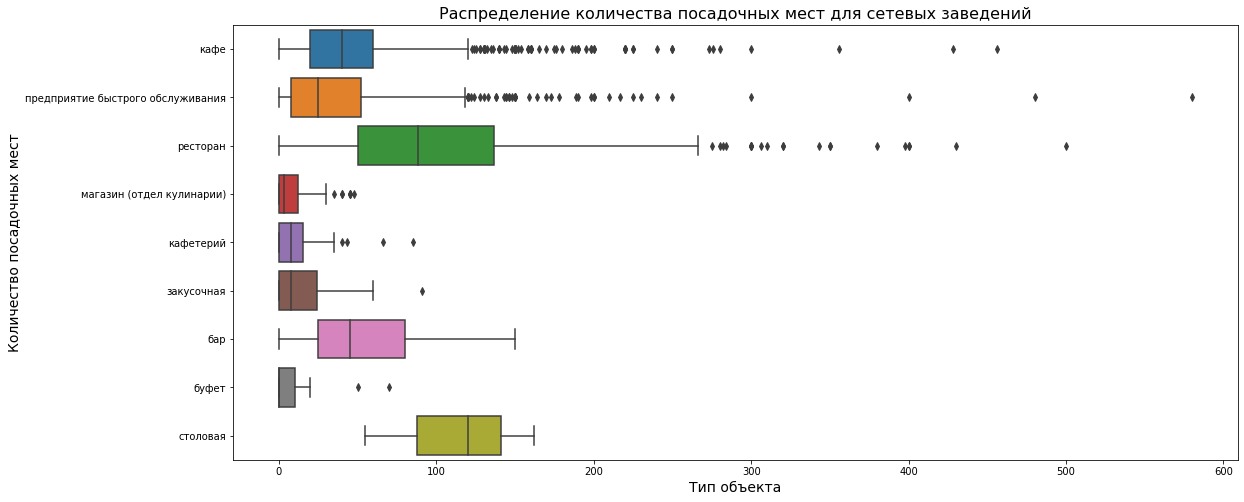

In [14]:
data_chain = data.query('chain == "да"')
plt.figure(figsize=(18,8))
sns.boxplot(x='number', y='object_type', data=data_chain)
plt.title('Распределение количества посадочных мест для сетевых заведений', fontsize=16)
plt.xlabel('Тип объекта', fontsize=14)
plt.ylabel('Количество посадочных мест', fontsize=14);

Итак, есть выбросы, особенно у таких типов, как кафе, предприятия быстрого обслуживания и ресторанов. Избавимся от выбросов, чтобы сделать графики информативнее.

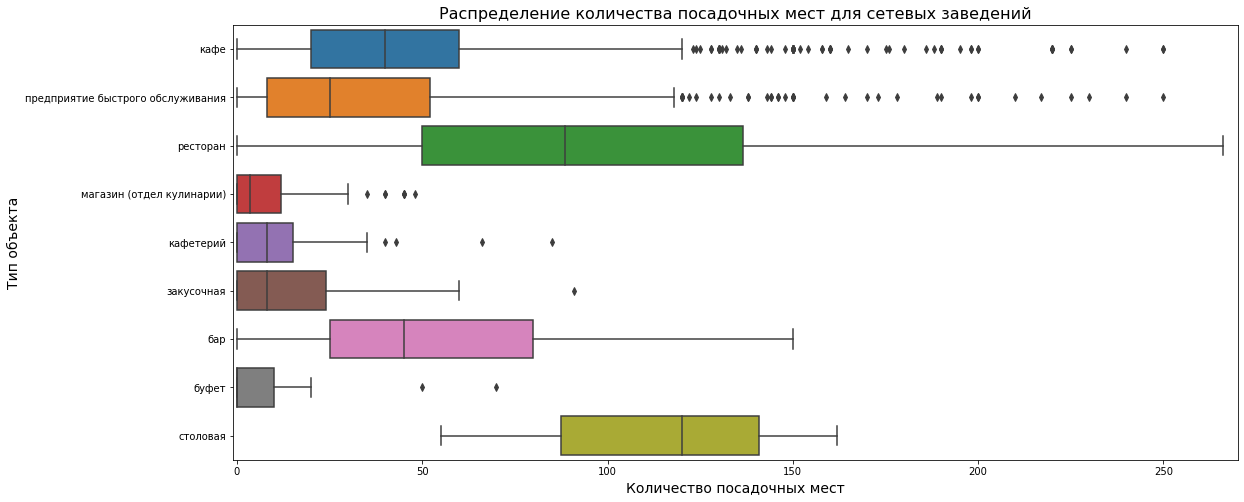

In [15]:
plt.figure(figsize=(18,8))
plt.xlim(-1, 270)
sns.boxplot(x='number', y='object_type', data=data_chain)
plt.title('Распределение количества посадочных мест для сетевых заведений', fontsize=16)
plt.xlabel('Количество посадочных мест', fontsize=14)
plt.ylabel('Тип объекта', fontsize=14);

**Вывод**\
Так намного лучше) Итак, наибольший разброс данных у ресторанов (от 0 до примерно 270 мест), а также у кафе и предприятий быстрого обслуживания (от 0 до 120). У все трех типов есть выбросы. Также у баров разброс от 0 до 150. И у столовых количество мест в диапозоне от 60 до 160 . Остальные типы имеют небольшой разброс количества посадочных мест. В итоге видно, что для сетевых заведений все же больше характерно маленькое количиство заведений с большим количеством посадочных мест. Посмотрю еще на распределение наиболее часто встречаемых типов сетевых заведений: кафе, предприятия быстрого обслуживания и ресторанов.

Хочу посмотреть еще график зависимости медианного количества посадочных мест от количества сетевых заведений.

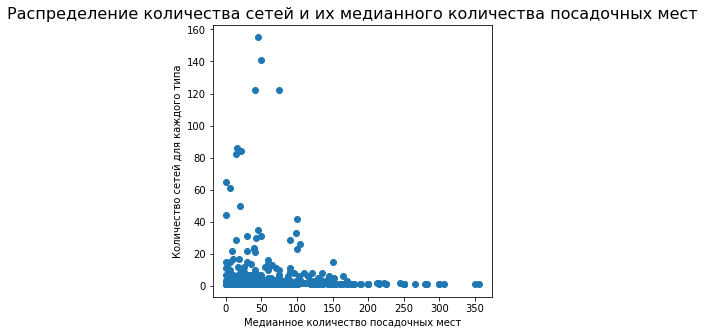

In [16]:
# Сгруппируем таблицу ссетевыми заведениями по типу объекта
data_chain_grouped = data_chain.groupby('object_name').agg({'id':'count', 'number':'median'})
data_chain_grouped.columns = ['objects_amount', 'median_number_of_seats']
plt.figure(figsize=(5,5))
plt.scatter(data_chain_grouped['median_number_of_seats'], data_chain_grouped['objects_amount'])
plt.title('Распределение количества сетей и их медианного количества посадочных мест', fontsize=16)
plt.xlabel('Медианное количество посадочных мест')
plt.ylabel('Количество сетей для каждого типа');

Посмотрим еще на 90-й персентиль в двух столбцах.

In [17]:
np.percentile(data_chain_grouped['objects_amount'], 90)

6.0

In [18]:
np.percentile(data_chain_grouped['median_number_of_seats'], 90)

130.0

**Вывод**\
Итак, по графику видно, что, в среднем, 90% сетей имеют не более 130 посадочных мест и 6 заведений. Таким образом мы еще раз убедились в том, что для сетевых заведений характерно следующее - мало заведений с большим количеством мест.

In [19]:
data_cafe = data_chain[data_chain['object_type'] == 'кафе']

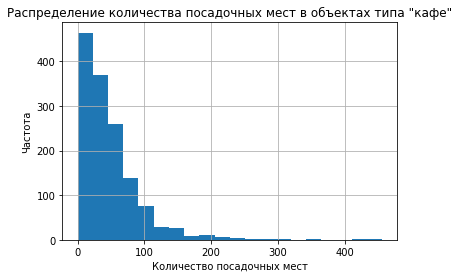

In [20]:
data_cafe['number'].hist(bins=20)
plt.title('Распределение количества посадочных мест в объектах типа "кафе"')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота');

<a id="analize5"></a>
### Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Построим графики

Посмотрю сначала на колонку **number** в общем.

In [21]:
data[['number']].describe()

,number
count,15366.000000
mean,59.547182
std,74.736833
min,0.000000
25%,12.000000
50%,40.000000
75%,80.000000
max,1700.000000


Поскольку в графиках выше были видны выбросы, я использую функцию **median**, а не **mean**.

In [22]:
num_of_seats_mean = (
    data.pivot_table(index='object_type', values='number', aggfunc='median')
        .sort_values(by='number', ascending=False)
        .reset_index()
)
num_of_seats_mean.columns = ['object_type','mean_seats']
num_of_seats_mean['mean_seats'] = round(num_of_seats_mean['mean_seats'],2)
num_of_seats_mean

,object_type,mean_seats
0,столовая,103
1,ресторан,80
2,бар,35
3,буфет,32
4,кафе,30
5,кафетерий,6
6,предприятие быстрого обслуживания,5
7,закусочная,0
8,магазин (отдел кулинарии),0


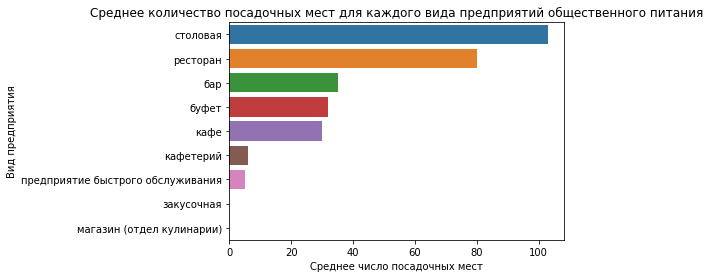

In [23]:
# построим график
ax = sns.barplot(x='mean_seats', y='object_type', data=num_of_seats_mean)
ax.set_title('Среднее количество посадочных мест для каждого вида предприятий общественного питания')
plt.xlabel('Среднее число посадочных мест')
plt.ylabel('Вид предприятия');

**Вывод**\
Самое большое в среднем количество посадочных мест предоставляет **столовая** (103 места). Меньше всего в среднем посадочных мест у кафетериев и предприятий быстрого обслуживания.

<a id="analize6"></a>
### Выделим в отдельный столбец информацию об улице из столбца address. 


Итак, просмотрев колонку address, решила сделать так, каждую ячейку колонки делю на подстроки (разделяются запятой), получается список из подстрок, который мы разобьем на колонки с помощью параметра "expand" . Из получившейся таблицы возьмем второй столбец, который как раз будет улицей(т.к. в столбце address образец везде одинаков: сначала город, потом улица, потом дом и т.д.).

In [24]:
address_split = data['address'].str.split(',', expand=True)
address_split.head()

,0,1,2,3,4,5,6
0,город Москва,улица Егора Абакумова,дом 9,None,None,None,None
1,город Москва,улица Талалихина,дом 2/1,корпус 1,None,None,None
2,город Москва,Абельмановская улица,дом 6,None,None,None,None
3,город Москва,Абрамцевская улица,дом 1,None,None,None,None
4,город Москва,Абрамцевская улица,дом 9,корпус 1,None,None,None


In [25]:
data['street'] = address_split[1]
data.head(3)

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица


**Вывод**\
Итак,мы добавили в общую таблицу колонку с названием района.

<a id="analize7"></a>
### Построим график топ-10 улиц по количеству объектов общественного питания. Ответим на вопрос — в каких районах Москвы находятся эти улицы?

Когда я сделала в первый раз график, увидела, что в него вошли город Зеленоград и поселение Сосенское. Решила убрать их из топ-списка, чтобы были только улицы. Ничего другого не придумала, как еще можно убрать то, что никак не относится к улицам.))

In [26]:
not_streets = [' город Зеленоград', ' поселение Сосенское']
data_streets = data.query('street not in @not_streets')

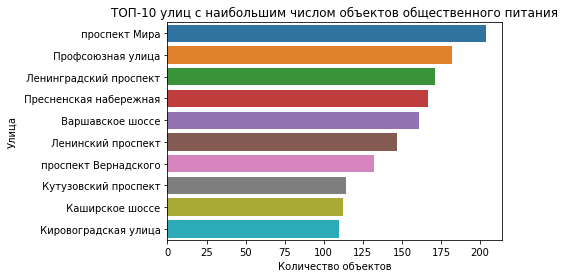

In [27]:
streets_with_max_objects = (
    data_streets.pivot_table(index='street', values='id', aggfunc='count')
        .sort_values(by='id', ascending=False)
        .reset_index()
        .head(10)
)

streets_with_max_objects.columns = ['street', 'amount_of_objects']
ax = sns.barplot(x='amount_of_objects', y='street', data=streets_with_max_objects)

ax.set_title('ТОП-10 улиц с наибольшим числом объектов общественного питания')
plt.xlabel('Количество объектов')
plt.ylabel('Улица');

In [28]:
streets_with_max_objects

,street,amount_of_objects
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,161
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


**Вывод**\
Итак, топ-10 улиц готов. На первом месте, проспект Мира.\
Продолжаем.

Подключим внешние данные к проекту, для того, чтобы посмотреть, в какихрайонах Москвы находятся эти улицы. Информация про районы и улицы Москвы возьмем с сайта https://data.mos.ru/opendata/7710881420-obshchestvennoe-pitanie-v-moskve/data/table?versionNumber=1&releaseNumber=86

In [29]:
from io import BytesIO
import requests
spreadsheet_id = '1H190jCvDMlCOwtzshWevyJgAkRf6TDtVzj5k1_vjfv4'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df.head(2) 

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,...,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Адрес,Контактный телефон,...,AdmArea_en,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""coordinates"":[37.714565000436,55.87900153130...",NaN


In [30]:
address_spl = df['Address'].str.split(',', expand=True)
df['street'] = address_spl[1]
df.head(2)

,ID,Name,global_id,IsNetObject,OperatingCompany,TypeObject,AdmArea,District,Address,PublicPhone,...,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea,street
0,Код,Наименование,global_id,Является сетевым,Название управляющей компании,Вид объекта,Административный округ по адресу,Район,Адрес,Контактный телефон,...,District_en,Address_en,PublicPhone_en,SeatsCount_en,SocialPrivileges_en,Longitude_WGS84_en,Latitude_WGS84_en,geodata_center,geoarea,None
1,00151635,СМЕТАНА,637376221,нет,NaN,кафе,Северо-Восточный административный округ,Ярославский район,"город Москва, улица Егора Абакумова, дом 9",PublicPhone:(499) 183-14-10\n\n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{""coordinates"":[37.714565000436,55.87900153130...",NaN,улица Егора Абакумова


In [31]:
# Обогатим нашу таблицу с топ-10 улицами сведениями о районах из внешней таблицы
streets_merged = streets_with_max_objects.merge(df[['District', 'street']], on='street', how='inner')

In [32]:
streets_merged

,street,amount_of_objects,District
0,проспект Мира,204,Мещанский район
1,проспект Мира,204,Мещанский район
2,проспект Мира,204,Мещанский район
3,проспект Мира,204,Мещанский район
4,проспект Мира,204,Мещанский район
...,...,...,...
1511,Кировоградская улица,110,район Чертаново Центральное
1512,Кировоградская улица,110,район Чертаново Центральное
1513,Кировоградская улица,110,район Чертаново Центральное
1514,Кировоградская улица,110,район Чертаново Центральное


Есть дубликаты, избавимся от них.

In [33]:
streets_merged.drop_duplicates().reset_index(drop=True).drop('amount_of_objects', 1)

,street,District
0,проспект Мира,Мещанский район
1,проспект Мира,Останкинский район
2,проспект Мира,Алексеевский район
3,проспект Мира,район Свиблово
4,проспект Мира,район Ростокино
5,Профсоюзная улица,Академический район
6,Профсоюзная улица,район Черёмушки
7,Профсоюзная улица,район Тёплый Стан
8,Профсоюзная улица,район Коньково
9,Профсоюзная улица,Обручевский район


**Вывод**\
Мы нашли информацию, в каких районах находятся улицы с максимальным количеством объектов общественного питания.

<a id="analize8"></a>
###  Найдем число улиц с одним объектом общественного питания. Ответим на вопрос — в каких районах Москвы находятся эти улицы?

In [34]:
streets_with_1_object = (
    data.pivot_table(index='street', values='id', aggfunc='count')
        .sort_values(by='id', ascending=False)
        .reset_index()
)

streets_with_1_object.columns = ['street', 'amount_of_objects']
streets_with_1_object = streets_with_1_object.query('amount_of_objects == 1')

In [35]:
streets_with_1_object.head()

,street,amount_of_objects
1321,улица Демьяна Бедного,1
1322,Андреево-Забелинская улица,1
1323,1-й Саратовский проезд,1
1324,Андроньевская площадь,1
1325,2-й Стрелецкий проезд,1


In [36]:
streets_with_1_object.shape

(579, 2)

In [37]:
df['street'].unique().shape

(1831,)

Объединим эту таблицу с таблицей, где указаны районы.

In [38]:
streets_1_ob_merged = streets_with_max_objects.merge(df[['District', 'street']], on='street', how='inner')

In [39]:
streets_1_ob_merged

,street,amount_of_objects,District
0,проспект Мира,204,Мещанский район
1,проспект Мира,204,Мещанский район
2,проспект Мира,204,Мещанский район
3,проспект Мира,204,Мещанский район
4,проспект Мира,204,Мещанский район
...,...,...,...
1511,Кировоградская улица,110,район Чертаново Центральное
1512,Кировоградская улица,110,район Чертаново Центральное
1513,Кировоградская улица,110,район Чертаново Центральное
1514,Кировоградская улица,110,район Чертаново Центральное


Выведем уникальные названия районов, где находятся улицы с одним объектом общественного питания.

In [40]:
for district in streets_1_ob_merged['District'].sort_values().unique():
   print('*', district)

* Академический район
* Алексеевский район
* Гагаринский район
* Донской район
* Ломоносовский район
* Мещанский район
* Нагорный район
* Обручевский район
* Останкинский район
* Пресненский район
* Хорошёвский район
* поселение Вороновское
* поселение Краснопахорское
* район Аэропорт
* район Беговой
* район Дорогомилово
* район Коньково
* район Москворечье-Сабурово
* район Нагатино-Садовники
* район Орехово-Борисово Северное
* район Орехово-Борисово Южное
* район Проспект Вернадского
* район Раменки
* район Ростокино
* район Свиблово
* район Сокол
* район Тропарёво-Никулино
* район Тёплый Стан
* район Фили-Давыдково
* район Чертаново Северное
* район Чертаново Центральное
* район Чертаново Южное
* район Черёмушки
* район Южное Бутово
* район Якиманка
* район Ясенево


In [41]:
streets_1_ob_merged['District'].unique().shape

(36,)

**Вывод**\
Итак, всего улиц с одним объектом общественного питания в Москве - 579. Это составляет около 31% от общего количества всех улиц. Также у нас есть список с 36 районами, в которых располагаются улицы с одним объектом общественного питания.

<a id="analize9"></a>
###  Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. 

Для этого сначала создадим список с 10 улицами с наибольшим количеством объектов общественного питания. Потом сделаем срез по основной таблице, где будут только строки с этими улицами. И построим "ящики с усами".

In [42]:
top_10_streets = streets_with_max_objects['street'].tolist()

In [43]:
top_10_streets

[' проспект Мира',
 ' Профсоюзная улица',
 ' Ленинградский проспект',
 ' Пресненская набережная',
 ' Варшавское шоссе',
 ' Ленинский проспект',
 ' проспект Вернадского',
 ' Кутузовский проспект',
 ' Каширское шоссе',
 ' Кировоградская улица']

In [44]:
top_data = data.query('street in @top_10_streets')

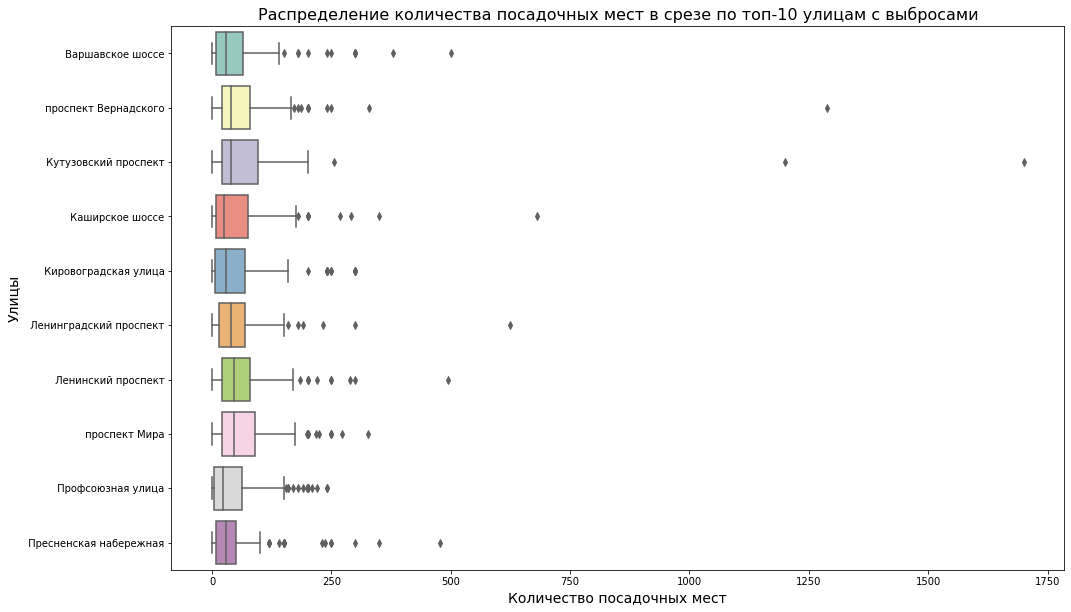

In [45]:
plt.figure(figsize=(16,10))
ax = sns.boxplot(x='number', y='street', data=top_data, palette='Set3')
plt.title('Распределение количества посадочных мест в срезе по топ-10 улицам с выбросами', fontsize=16)
plt.xlabel('Количество посадочных мест', fontsize=14)
plt.ylabel('Улицы', fontsize=14);


Из-за выбросов график не так информативен, избавимся от них

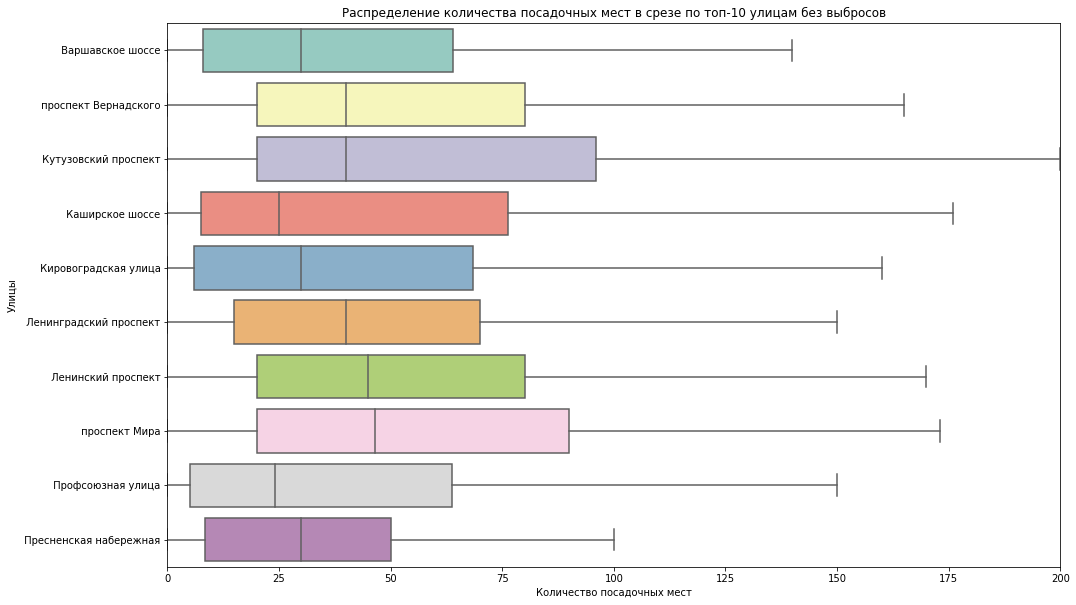

In [46]:
plt.figure(figsize=(16,10))
ax = sns.boxplot(x='number', y='street', data=top_data, palette='Set3', showfliers=False)
plt.title('Распределение количества посадочных мест в срезе по топ-10 улицам без выбросов')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Улицы');
ax.set_xlim(0,200);

In [47]:
top_data['number'].median()

40.0

**Вывод**\
Итак, во-первых, есть выбросы. Во-вторых, улица c наибольшим разбросом количества посадочных мест - Кутузовский проспект. Основная масса заведений имеют не более 100-150 посадочных мест. А медианное значение количества посадочных мест в нашем топ-списке - 40 мест.

<a id="conclusion"></a>
## Общий вывод

Итак, что мы выяснили:
- Наибольшее количество типов объектов общественного притания составляют такие предприятия, как кафе (40% от общего числа заведений), столовые (17%), рестораны (15%) и предприятия быстрого обслуживания (13%).
- Сетевых заведений всего лишь 20% от общего количества. Остальные предприятия - несетевые.
- Сетевое распространение характерно для кафе (47% от общего количества сетевых заведений), предприятий быстрого обслуживания (27%) и ресторанов (18%). В меньшей степени оно характерно для магазинов (29% заведений), ресторанов (24% заведений) и кафе (23% заведений). Остальных типов среди сетевых заведений очень мало.
- В среднем, 90% сетей имеют не более 130 посадочных мест и 6 заведений.
- Для сетевых заведений характерно следующее - мало заведений с большим количеством посадочных мест.
- **Среднее количество посадочных мест по типам объектов общественного питания:**\
 *столовая* - 103\
 *ресторан* - 80\
 *бар* - 35\
 *буфет* - 32\
 *кафе* - 30\
Как мы видим, у типов объекта **столовая** наибольшее количество, в среднем, посадочных мест (103) 

- **Топ-10 улиц с наибольшим количеством заведений:**
 проспект Мира
 *Профсоюзная улица\
 Ленинградский проспект\
 Пресненская набережная\
 Варшавское шоссе\
 Ленинский проспект\
 проспект Вернадского\
 Кутузовский проспект\
 Каширское шоссе\
 Кировоградская улица*
 
- Среднее количество посадочных мест в заведениях на топ-10 улицах равно 40.
- У нас есть список из 36 районов, в которых есть улицы с одним объектом общественного питания.
 




**РЕКОМЕНДАЦИИ**\
Честно говоря, хотелось бы побольше вводных данных от инвесторов... Но имеем, то что есть. Поскольку мы выяснили, что самые популярные заведения в Москве (предполагая, что поскольку их больше, то они и популярнее) - это кафе, предприятия фастфуд, столовые и рестораны, а мы по вводным данным и желаем открыть кафе. Значит тут все хорошо. Небольшое кафе с количеством 30-40 посадочных мест - хороший вариант. Самый главный вопрос - это то, где именно разместить кафе. Конечно, для ответа на этот вопрос желательно провести более глубокое исследование. Подробней изучить заведения, находящиеся на топ-10 улицах с максимальным количеством заведений. Может быть, изучить средний чек в заведениях, зависимость среднего чека от типа заведения. Что может повысить посещаемость - близость метро, наличие мест скопления людей (бизнес-центры, учебные заведения, какие-то крупные предприятия, отели, гостиницы). Это все тоже желательно изучить подробнее.\
По тому исследованию, которое я провела, мне кажется, есть **два пути**, по которому можно пойти.

**1)** Рассмотреть топ-10 улиц, поскольку не просто так на них располагается максимальное количество разных заведений. Но есть и минус, большое количество конкурентов. Значит, надо искать идеи, как выгодно выделиться, чтобы привлечь клиентов.\
**2)** Рассмотреть районы, в которых есть улицы с одним заведением. Но тут тоже понадобиться новое исследование. Возможно среди этих районов найдутся перспективные, например, со стоящимися ЖК поблизости. Большой плюс этого подхода - меньше конкурентов. Но этот вопрос надо очень внимательно изучать, чтобы не ошибиться с выбором места.

**ССЫЛКА НА ПРЕЗЕНТАЦИЮ**

Презентация: https://cloud.mail.ru/public/ZtWa/NejPhCcoP